In [1]:
import numpy as np
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def great_circle_distance(p1, p2):
    """Compute the great-circle (geodesic) distance between two points on a unit sphere."""
    return np.arccos(np.clip(np.dot(p1, p2), -1.0, 1.0))

In [3]:
def compute_distance_matrix(points):
    """Compute the pairwise geodesic distance matrix."""
    n = len(points)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            dist = great_circle_distance(points[i], points[j])
            dist_matrix[i, j] = dist_matrix[j, i] = dist
    return dist_matrix

In [4]:
def latlon_to_xyz(lat, lon):
    lat, lon = np.radians(lat), np.radians(lon)  # Convert degrees to radians
    x = np.cos(lat) * np.cos(lon)
    y = np.cos(lat) * np.sin(lon)
    z = np.sin(lat)
    return np.vstack((x, y, z)).T

In [18]:
def find_clusters_inconsistent(linkage_matrix, threshold=0.1):
    """
    Finds clusters using the 'inconsistent' criterion.
    
    Parameters:
        linkage_matrix: Output from hierarchical clustering.
        threshold: Inconsistency threshold (default = 1.0, can be adjusted).
        
    Returns:
        labels: Cluster labels assigned to each point.
        num_clusters: Number of clusters detected.
    """
    labels = sch.fcluster(linkage_matrix, threshold, criterion='inconsistent')
    num_clusters = len(np.unique(labels))  # Count unique cluster labels
    return labels, num_clusters


In [20]:
def find_optimal_inconsistent_threshold(linkage_matrix, percentile=80):
    """
    Automatically selects an inconsistency threshold using the percentile of inconsistencies.
    
    Parameters:
        linkage_matrix: Output from hierarchical clustering.
        percentile: The percentile of the inconsistency coefficient to use (default = 80).
    
    Returns:
        optimal_threshold: Selected threshold.
    """
    inconsistency_matrix = sch.inconsistent(linkage_matrix)
    inconsistency_values = inconsistency_matrix[:, -1]  # Get the last column (inconsistency coefficient)
    optimal_threshold = np.percentile(inconsistency_values, percentile)  # Use the 80th percentile
    return optimal_threshold

In [21]:
optimal_threshold = find_optimal_inconsistent_threshold(linkage_matrix, percentile=80)

# Apply hierarchical clustering with the computed threshold
labels = sch.fcluster(linkage_matrix, optimal_threshold, criterion='inconsistent')
num_clusters = len(np.unique(labels))  # Count unique clusters

print(f"Optimal Number of Clusters (Inconsistency Criterion): {num_clusters}")
print(f"Selected Inconsistency Threshold: {optimal_threshold}")

Optimal Number of Clusters (Inconsistency Criterion): 15
Selected Inconsistency Threshold: 0.8747750612808622


In [40]:
data = np.loadtxt("Test.txt")  # Assumes tab or space-delimited file

# Extract latitude and longitude
latitudes = data[:, 0]
longitudes = data[:, 1]

# Convert to Cartesian coordinates
points = latlon_to_xyz(latitudes, longitudes)

In [41]:
distance_matrix = compute_distance_matrix(points)
condensed_matrix = ssd.squareform(distance_matrix)  # Convert to condensed form

# Perform hierarchical clustering
linkage_matrix = sch.linkage(condensed_matrix, method='average')

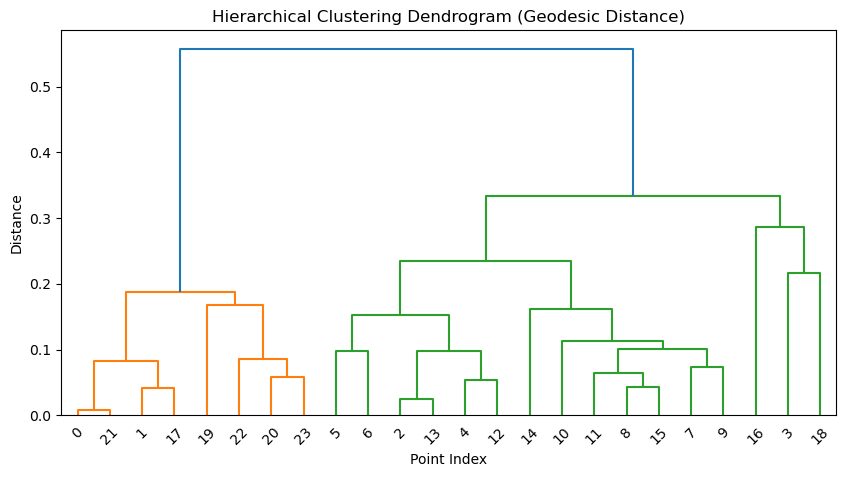

In [36]:
plt.figure(figsize=(10, 5))
sch.dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram (Geodesic Distance)")
plt.xlabel("Point Index")
plt.ylabel("Distance")
plt.show()

In [38]:
threshold_value = 1.5 # Adjust based on dataset characteristics
labels, optimal_clusters = find_clusters_inconsistent(linkage_matrix, threshold_value)

print(f"Optimal Number of Clusters (Inconsistency Criterion): {optimal_clusters}")

Optimal Number of Clusters (Inconsistency Criterion): 1


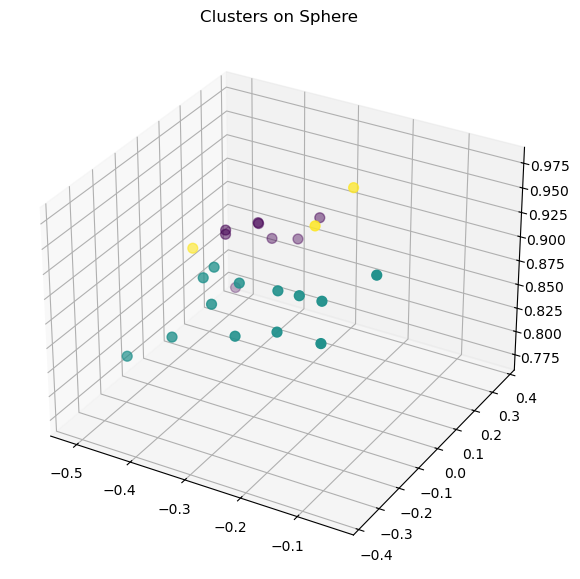

In [39]:
num_clusters = 3
labels = sch.fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# 3D scatter plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, cmap='viridis', s=50)
ax.set_title("Clusters on Sphere")
plt.show()